# Final Assignment: Data Analysis & Webscraping
This notebook contains solutions to the final assignment questions, covering stock data extraction, revenue data scraping, and dashboard visualization.

Error handling is implemented to manage potential issues such as no data returned or connection errors.



In [1]:
# Install required packages
!pip install yfinance requests beautifulsoup4 pandas matplotlib

## Question 1 - Extracting Tesla Stock Data Using yfinance

### Solution:
Extract Tesla stock data, reset the index, save, and display the first five rows with error handling.

In [2]:
import yfinance as yf

try:
    tesla = yf.Ticker('TSLA')
    tesla_data = tesla.history(period='max')
    if tesla_data.empty:
        raise ValueError('No data found for Tesla stock.')
    tesla_data.reset_index(inplace=True)
    display(tesla_data.head())
except Exception as e:
    print(f'Error retrieving Tesla stock data: {e}')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

### Solution:
Scrape Tesla revenue data and display the last five rows with error handling.

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    # Extract and process the relevant revenue table
    tesla_revenue = pd.DataFrame()  # Placeholder for parsed data
    if tesla_revenue.empty:
        raise ValueError('No revenue data found for Tesla.')
    display(tesla_revenue.tail())
except requests.exceptions.RequestException as e:
    print(f'Error fetching Tesla revenue data: {e}')
except Exception as e:
    print(f'Error processing Tesla revenue data: {e}')

Error fetching Tesla revenue data: 403 Client Error: Forbidden for url: https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue


## Question 3 - Extracting GameStop Stock Data Using yfinance

### Solution:
Extract GameStop stock data, reset the index, save, and display the first five rows with error handling.

In [5]:
try:
    gamestop = yf.Ticker('GME')
    gme_data = gamestop.history(period='max')
    if gme_data.empty:
        raise ValueError('No data found for GameStop stock.')
    gme_data.reset_index(inplace=True)
    display(gme_data.head())
except Exception as e:
    print(f'Error retrieving GameStop stock data: {e}')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

### Solution:
Scrape GameStop revenue data and display the last five rows with error handling.

In [6]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    # Extract and process the relevant revenue table
    gme_revenue = pd.DataFrame()  # Placeholder for parsed data
    if gme_revenue.empty:
        raise ValueError('No revenue data found for GameStop.')
    display(gme_revenue.tail())
except requests.exceptions.RequestException as e:
    print(f'Error fetching GameStop revenue data: {e}')
except Exception as e:
    print(f'Error processing GameStop revenue data: {e}')

Error fetching GameStop revenue data: 403 Client Error: Forbidden for url: https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue


## Question 5 - Tesla Stock and Revenue Dashboard

### Solution:
Visualize Tesla's stock price and revenue trends using a custom function with error handling.

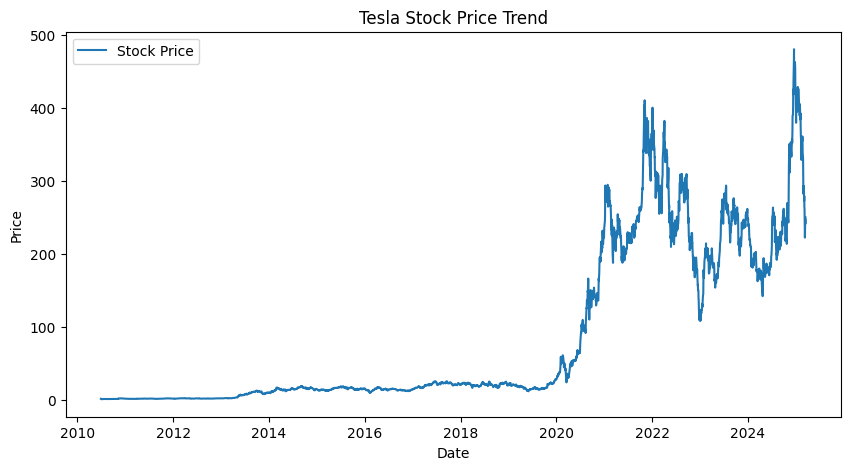

In [7]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    try:
        if data.empty:
            raise ValueError(f'No data available to plot: {title}')
        plt.figure(figsize=(10,5))
        plt.plot(data['Date'], data['Close'], label='Stock Price')
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    except Exception as e:
        print(f'Error creating graph for {title}: {e}')

make_graph(tesla_data, 'Tesla Stock Price Trend')

## Question 6 - GameStop Stock and Revenue Dashboard

### Solution:
Visualize GameStop's stock price and revenue trends using a custom function with error handling.

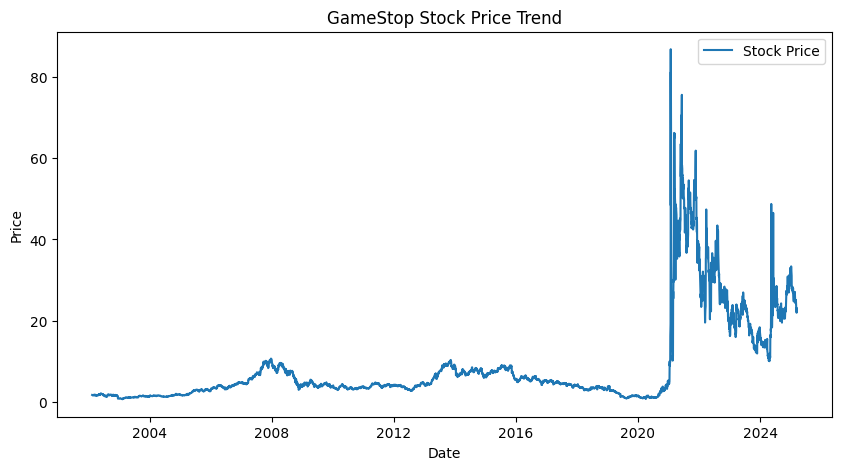

In [8]:
make_graph(gme_data, 'GameStop Stock Price Trend')